In [1]:
import keras
from sklearn.model_selection import train_test_split

# IMDB 데이터 셋
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=500)

In [2]:
# 훈련세트, 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [3]:
# 패딩 처리 
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
# LSTM 순환신경망 층 구성 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.GRU(8, dropout=0.2, return_sequences=True)) # return_sequences 모든 은닉 상태 출력을 전달 
model.add(keras.layers.GRU(8, dropout=0.2)) # 마지막 은닉상태만 출력 
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 8)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,065 (35.41 KB)

 Trainable params: 9,065 (35.41 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [6]:
hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5742 - loss: 0.6583 - val_accuracy: 0.7558 - val_loss: 0.5177
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7446 - loss: 0.5186 - val_accuracy: 0.7648 - val_loss: 0.4896
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7727 - loss: 0.4794 - val_accuracy: 0.7936 - val_loss: 0.4492
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8000 - loss: 0.4379 - val_accuracy: 0.7882 - val_loss: 0.4510
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8072 - loss: 0.4267 - val_accuracy: 0.8028 - val_loss: 0.4290
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8113 - loss: 0.4183 - val_accuracy: 0.8058 - val_loss: 0.4263
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8095 - loss: 0.4229 - val_accuracy: 0.8094 - val_loss: 0.4218
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8165 - loss: 0

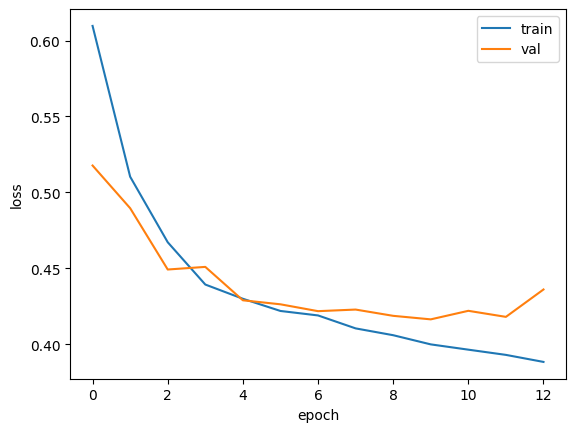

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()